In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df=pd.read_csv('/home/anu/Downloads/Datasets/titanic(1).csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [3]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)

In [4]:
inputs=df.drop('Survived',axis='columns')
target=df.Survived

In [5]:
inputs.Sex=inputs.Sex.map({'male':1,'female':0})

In [6]:
def input_missing_age(columns):
    age =columns[0]
    passenger_class = columns[1]
    if pd.isnull(age):
        if(passenger_class==1):
            return inputs[inputs['Pclass']==1]['Age'].mean()
        elif(passenger_class==2):
            return inputs[inputs['Pclass']==2]['Age'].mean()
        elif(passenger_class==3):
            return inputs[inputs['Pclass']==3]['Age'].mean()
    else:
        return age

In [7]:
inputs['Age']=inputs[['Age','Pclass']].apply(input_missing_age,axis=1)

<AxesSubplot:>

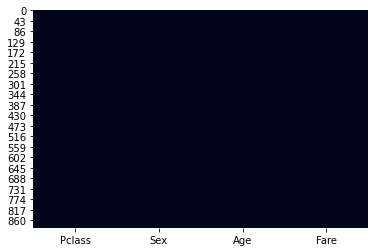

In [8]:
sns.heatmap(inputs.isnull(),cbar=False)

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
target.value_counts()

0    549
1    342
Name: Survived, dtype: int64

# stratify used in split to distribute the data in training and testing equally

In [11]:
X_train,X_test,y_train,y_test=train_test_split(inputs,target,random_state=101,stratify=target,test_size=0.2)

In [12]:
y_train.value_counts(normalize=True)

0    0.616573
1    0.383427
Name: Survived, dtype: float64

In [13]:
#Since we used stratify in split, we got y_train value and y_test value almost same
y_test.value_counts(normalize=True)


0    0.614525
1    0.385475
Name: Survived, dtype: float64

In [14]:
from sklearn import tree
model=tree.DecisionTreeClassifier()

model.fit(X_train,y_train)

DecisionTreeClassifier()

In [15]:
model.score(X_train,y_train)

0.9845505617977528

In [16]:
model.score(X_test,y_test)

0.7374301675977654

In [17]:
y_pred=model.predict_proba(X_test)[:,1]
y_pred

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 1.        , 0.        , 0.        ,
       1.        , 1.        , 0.        , 0.        , 1.        ,
       0.5       , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 0.5       , 1.        , 0.        ,
       0.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 1.        , 1.        , 1.        , 0.        ,
       0.        , 1.        , 1.        , 0.        , 1.        ,
       0.14285714, 1.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       1.        , 0.        , 1.        , 0.14285714, 1.        ,
       0.        , 1.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 1.        , 1.        , 0.     

In [18]:
#increasing threshold now
#This is to control the threshold to manipulate the output
new_y=[]#predicted value
for i in range(len(y_pred)):
    if y_pred[i]<0.1:
        new_y.append(0)
    else:
        new_y.append(1)

In [19]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,new_y)

0.7206703910614525

In [20]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
train_accuracy=[]
validation_accuracy=[]

for i in range(1,10):
    dt_model=DecisionTreeClassifier(max_depth=i,random_state=10)
    dt_model.fit(X_train,y_train)
    train_accuracy.append(dt_model.score(X_train,y_train))
    validation_accuracy.append(dt_model.score(X_test,y_test))
    

In [22]:
frame=pd.DataFrame({'max_depth':range(1,10),'train_acc':train_accuracy,'valid_acc':validation_accuracy})
frame
# max _depth till 9 we calculated the value for train_acc,validation accuracy
#now compare it in below graph

,max_depth,train_acc,valid_acc
0,1,0.797753,0.743017
1,2,0.801966,0.754190
2,3,0.834270,0.776536
3,4,0.851124,0.798883
4,5,0.858146,0.815642
5,6,0.876404,0.821229
6,7,0.887640,0.787709
7,8,0.903090,0.810056
8,9,0.929775,0.782123


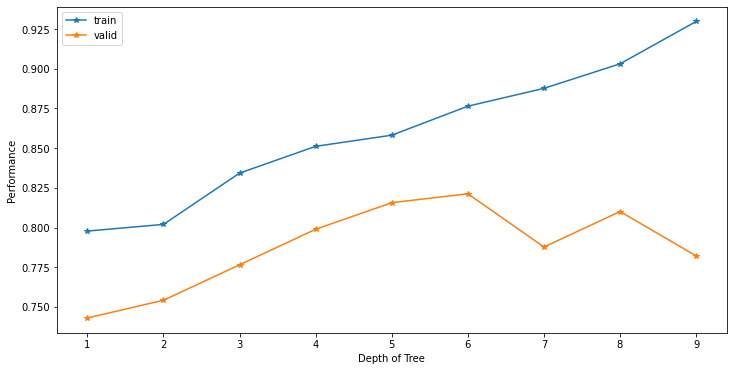

In [23]:
plt.figure(figsize=(12,6))
plt.plot(frame['max_depth'],frame['train_acc'],marker='*')
plt.plot(frame['max_depth'],frame['valid_acc'],marker='*')
plt.xlabel('Depth of Tree')
plt.ylabel('Performance')
plt.legend(['train','valid'])
plt.show()

In [24]:
#till 

In [25]:
tree_img =tree.export_graphviz(model,out_file='tree.dot',feature_names=inputs.columns,
                              max_depth=6,filled=True)

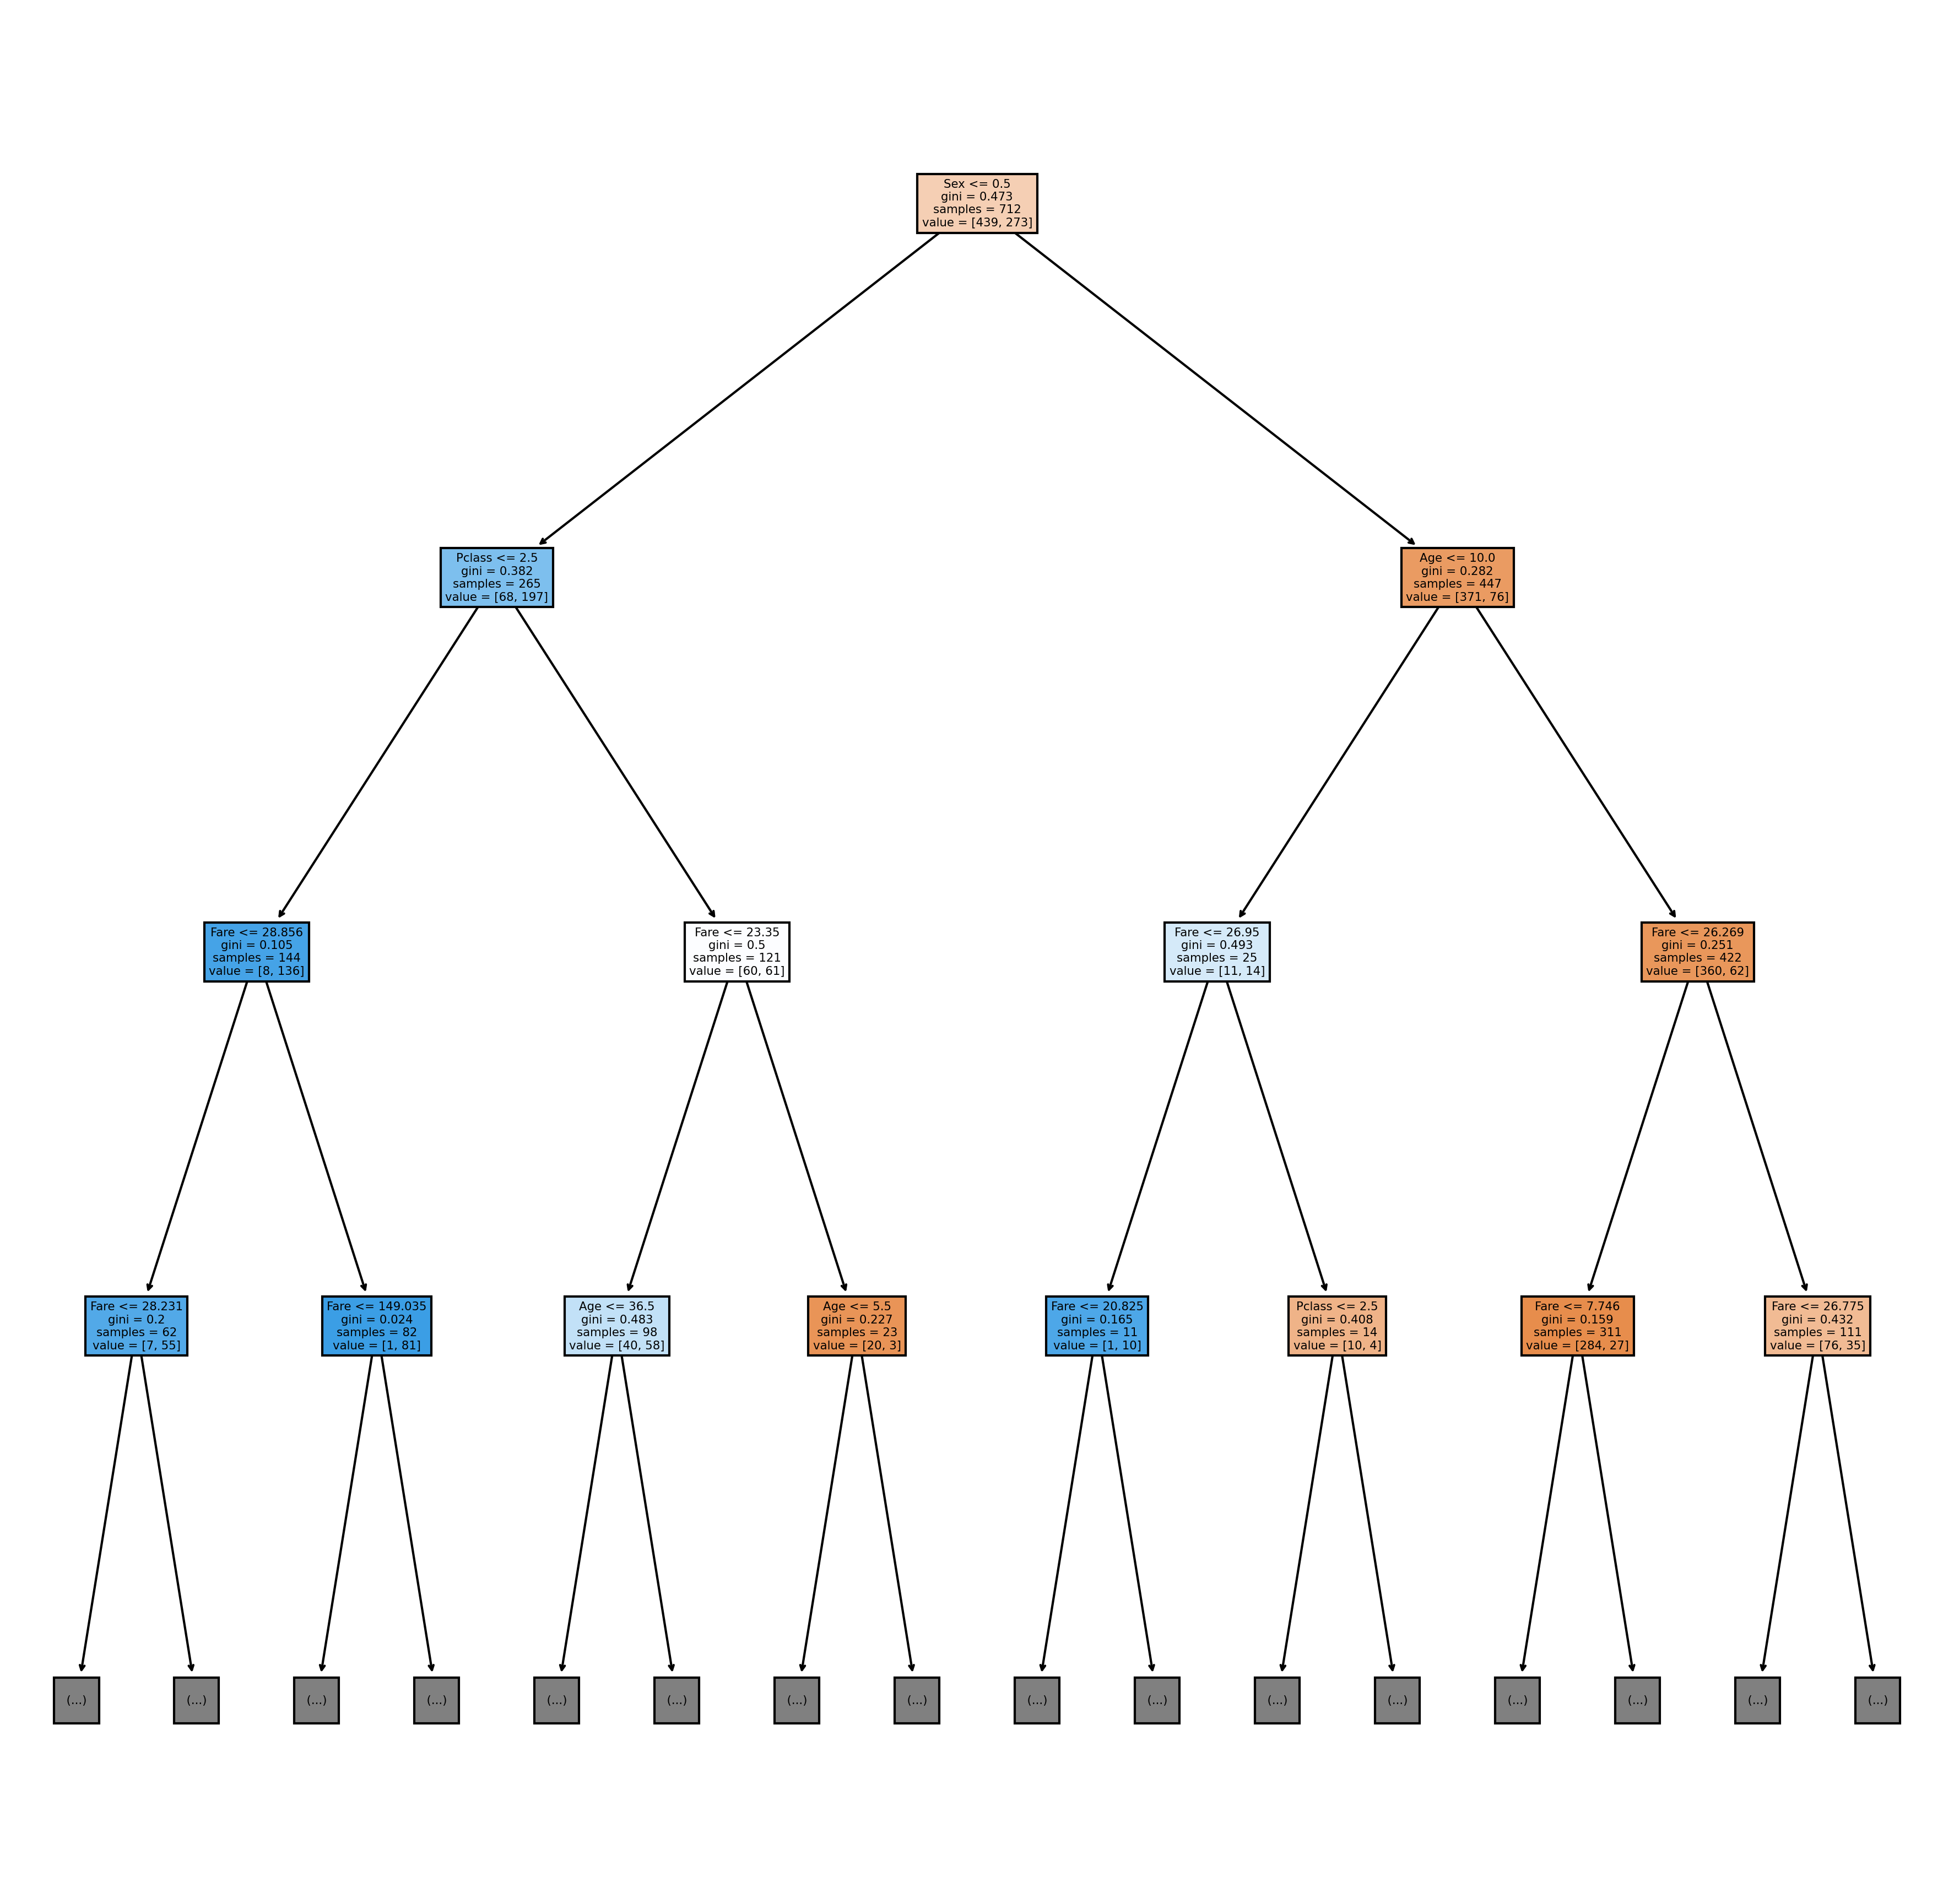

In [26]:
#image=plt.imread('tree24.png')
#plt.figure(figsize=(20,15))
#plt.imshow(image)
fig,axes = plt.subplots(nrows=1,ncols=1,figsize=(15,15),dpi=300)
a=tree.plot_tree(model,feature_names=inputs.columns,
max_depth=3,filled=True)#also try max_depth=3 or None
fig.savefig('tree24.png') 

In [27]:
dt_model=DecisionTreeClassifier(max_depth=6,random_state=10)
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6, random_state=10)

In [28]:
dt_model.score(X_train,y_train)

0.8764044943820225

In [29]:
dt_model.score(X_test,y_test)

0.8212290502793296

In [30]:
train_accuracy=[]
validation_accuracy=[]

for i in range(2,20):
    dt_model=DecisionTreeClassifier(max_depth=i,random_state=10,\
                                   min_samples_leaf=i,min_samples_split=i,max_leaf_nodes=i)
    
    dt_model.fit(X_train,y_train)
    train_accuracy.append(dt_model.score(X_train,y_train))
    validation_accuracy.append(dt_model.score(X_test,y_test))
    

In [31]:
frame=pd.DataFrame({'max_depth':range(2,20),'min_samples_leaf':range(2,20),\
                    'min_samples_split':range(2,20),'max_leaf_nodes':range(2,20),\
                    'train_acc':train_accuracy,'valid_acc':validation_accuracy})
frame

,max_depth,min_samples_leaf,min_samples_split,max_leaf_nodes,train_acc,valid_acc
0,2,2,2,2,0.797753,0.743017
1,3,3,3,3,0.797753,0.743017
2,4,4,4,4,0.801966,0.754190
3,5,5,5,5,0.801966,0.754190
4,6,6,6,6,0.825843,0.776536
5,7,7,7,7,0.834270,0.776536
6,8,8,8,8,0.845506,0.770950
7,9,9,9,9,0.848315,0.782123
8,10,10,10,10,0.848315,0.782123
9,11,11,11,11,0.856742,0.787709


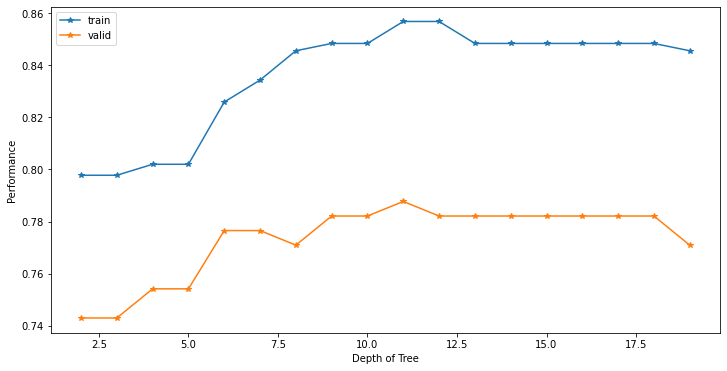

In [32]:
plt.figure(figsize=(12,6))
plt.plot(frame['max_depth'],frame['train_acc'],marker='*')
plt.plot(frame['max_depth'],frame['valid_acc'],marker='*')
plt.xlabel('Depth of Tree')
plt.ylabel('Performance')
plt.legend(['train','valid'])
plt.show()